In [1]:
import os
import scanpy as sc
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
output = '/home/carsten/alvira_bioinformatics/hif1a_tagln/data/output'
sc.settings.figdir = output
os.makedirs(output, exist_ok = True)

In [2]:
print(sc.__version__)

1.8.1


# Data from GSE172251
## Data came as raw counts, with cells/genes already filtered in original paper
### Just need to scale the counts and adjust metadata

In [3]:
adata = sc.read_csv('/home/carsten/alvira_bioinformatics/hif1a_tagln/data/GSE172251_table_counts_lungmese.tsv.gz',
                  delimiter='\t').T
metadata = pd.read_csv('/home/carsten/alvira_bioinformatics/hif1a_tagln/data/GSE172251_table_cellmetadata_lungmese.tsv.gz',
                      delimiter='\t',
                      index_col=0)
adata.obs = metadata
adata.obs['Cell Subtype'].replace({'Early adventitial fibroblast': 'Adventitial fibroblast',
                                  'Early alveolar fibroblast': 'Alveolar fibroblast',
                                  'Early airway smooth muscle': 'Airway smooth muscle'}, inplace=True) #combine cell types over time
sc.pp.normalize_total(adata, target_sum=1e6)
sc.pp.log1p(adata, base=2)



## Figure 1 
### dotplot of Hif1a/Tagln expressing mesenchymal 

/home/carsten/anaconda3/envs/acz_sc/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
/home/carsten/anaconda3/envs/acz_sc/lib/python3.7/site-packages/anndata/_core/anndata.py:1229: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning
Trying to set attribute `.obs` of view, copying.
... storing 'source name' as categorical
/home/carsten/anaconda3/envs/acz_sc/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsor

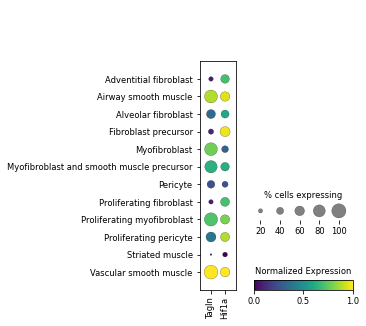

In [4]:
norm_adata = adata[adata.obs['Treatment'] == 'normal', :]
sc.pl.DotPlot(norm_adata,
              ['Tagln','Hif1a'],
              standard_scale='var',
              groupby = 'Cell Subtype').legend(width = 2, size_title='% cells expressing',colorbar_title= 'Normalized Expression').style(cmap='viridis').savefig(os.path.join(output,f'dotplot_fig1_hif1a_tagln.png'), dpi = 300)

# Figure 2
## Coexpression of Hif1a and Tagln, Pdgfra 

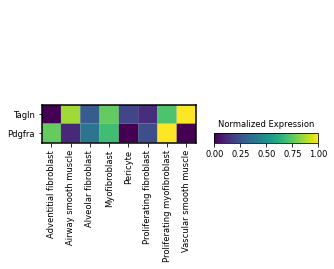

In [5]:
from scipy.stats import zscore

p1_p7_adata = norm_adata[norm_adata.obs['Timepoint'].isin(['P1','P7','P21']),:]
ge_20_cells = p1_p7_adata.obs['Cell Subtype'].value_counts() >= 20
genes = ['Tagln',
#          'Hif1a',
         'Pdgfra']
cts = sorted(ge_20_cells.loc[ge_20_cells == True].index)
p1_p7_adata = p1_p7_adata[p1_p7_adata.obs['Cell Subtype'].isin(cts),:]

    
sc.pl.MatrixPlot(p1_p7_adata,
                 genes,
                 standard_scale='var',
                 groupby = ['Cell Subtype']).swap_axes().legend(width = 2, title='Normalized Expression').style(cmap='viridis').savefig(os.path.join(output,f'matrixplot_fig2_tagln_pdgfra.png'), dpi = 300)